In [73]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
import pandas as pd 

In [74]:
import torch
import cv2

In [75]:
import tensorflow

### Yolo model

In [76]:
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
yolo_model.classes=0 # pedestrians

Using cache found in C:\Users\eocoeog/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-1 Python-3.9.12 torch-1.12.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## functions

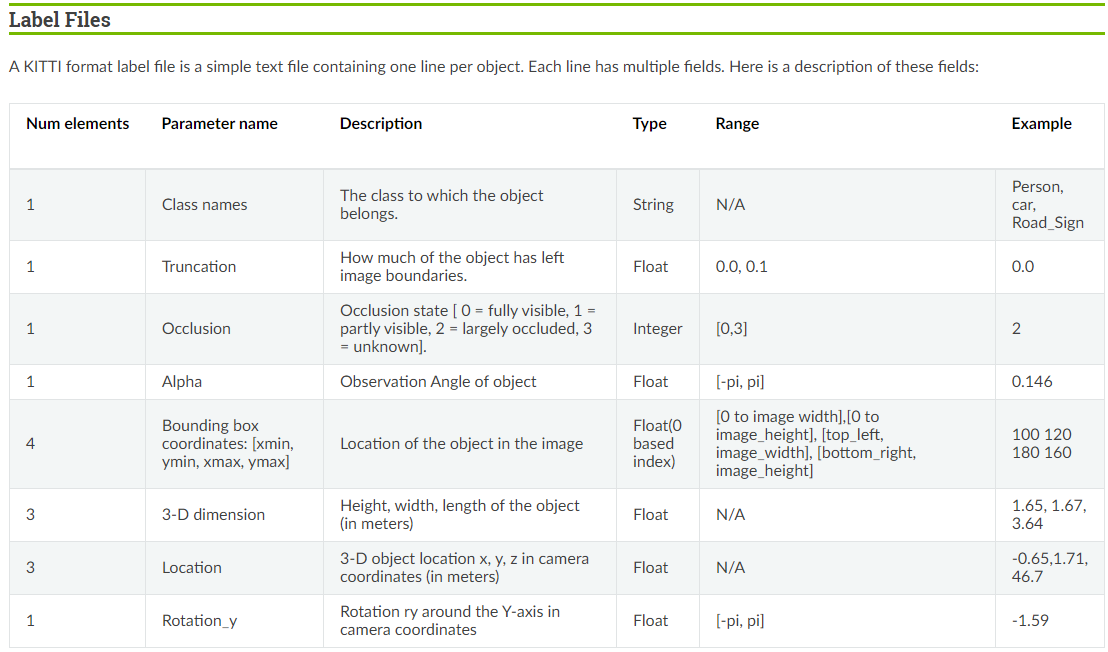
https://docs.nvidia.com/tao/archive/tlt-20/tlt-user-guide/text/preparing_data_input.html

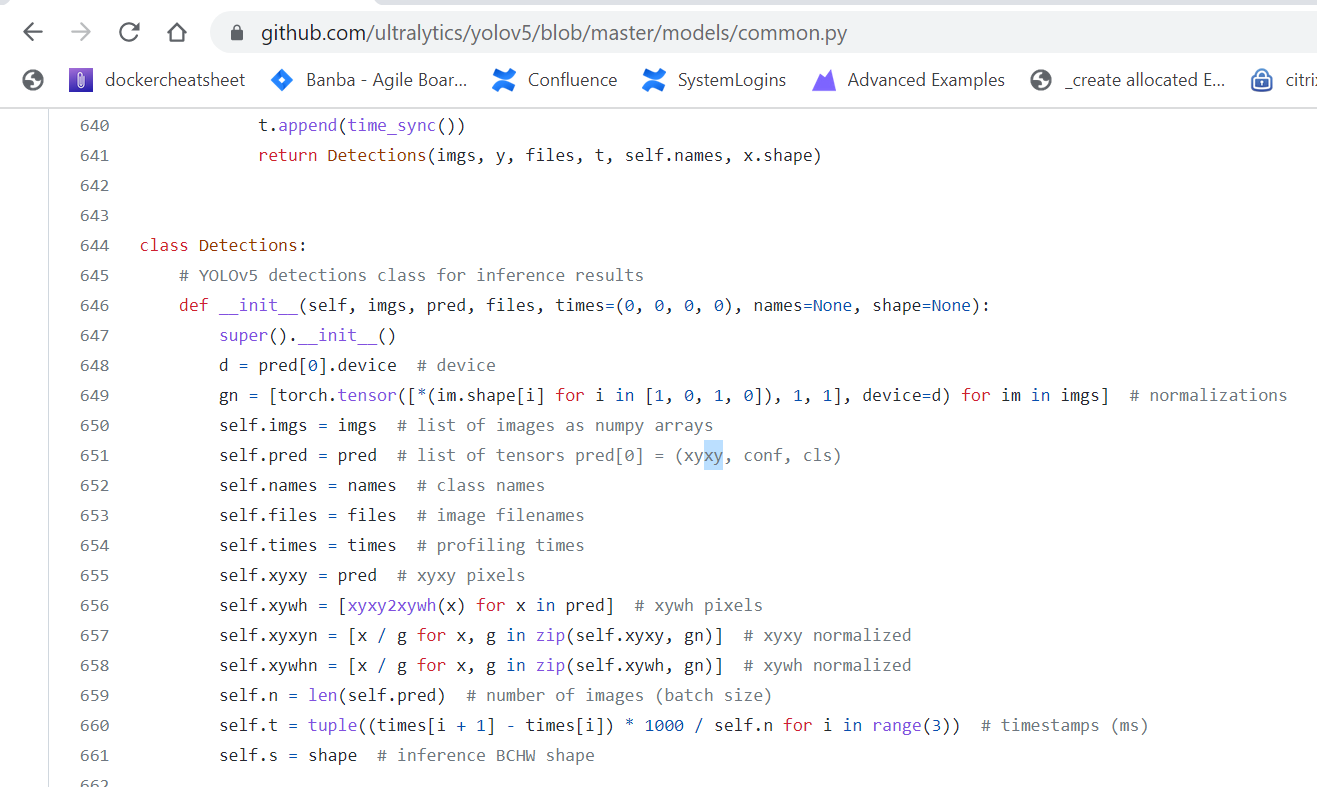
https://github.com/ultralytics/yolov5/blob/master/models/common.py

In [77]:
def get_inputs(results):
    try:
        inputs = []
        out = results.xywh[0].numpy()
        for obj in out:
            if obj[-1] == 0:
                inputs.append(obj[0:4])
                
        return inputs
    
    except:
        print('Empty')

In [78]:
def get_label_info(file):
    labels = []
    with open(file) as f:
        content = f.readlines()
    for obj in content:
        labels.append(obj.split(' '))
    return labels
    

In [191]:
def match(results, labels):
    try:
        yolo_xyxy = []
        yolo_xywh = get_inputs(results)
        label_xyxy = []
        votes = {}
        matches = {}
        param_label = np.array([])
        all_obj_xyxy = results.xyxy[0].numpy()
        for obj in all_obj_xyxy:
            if obj[-1] == 0:
                yolo_xyxy.append(obj[0:4])
                
        for obj in labels:
            if obj[0] == 'Pedestrian':
                label_xyxy.append(obj[4:8])
                
        label_xyxy = np.array(label_xyxy).astype(float)
        majority = len(label_xyxy)/2 if len(label_xyxy) > len(yolo_xyxy)/2 else len(yolo_xyxy)/2
        
        for ind, obj in enumerate (yolo_xyxy):
            vote ={}
            for inner_ind, val in enumerate (obj):
                label_ind = np.abs(label_xyxy[:,inner_ind] - val).argmin()
                vote[label_ind] = vote.get(label_ind,0)+1
            h_vote = max(vote, key=vote.get)
            if vote[h_vote] > majority:
                matches[ind] = h_vote
        for k,v in matches.items():
            temp = np.array(yolo_xywh[k])
            temp= np.append(temp, labels[v][-2])
            print(type(temp))
            if k ==0:
                param_label.append(temp.astype(float))#.astype(float)
            else:
        return param_label
    except:
        pass

In [192]:
train_img_dir = 'data_object_image_2/training/image_2/'
train_label_dir = 'data_object_label_2/training/label_2/'
sorted_inputs = []
sorted_labels = []
inputs_labels = []
x = 0
for filename in os.listdir(train_img_dir):
    if x == 28:
        break
    x +=1
    ind = filename[0:6]
    img_file = train_img_dir + ind + '.png'
    label_file = train_label_dir + ind + '.txt'
    results = yolo_model(img_file)
    labels = get_label_info(label_file)
    params_labels = np.array(match(results, labels))
    try:
        sorted_inputs.append( params_labels[:, 0:4])
        sorted_labels.append( params_labels[:,-1])
        inputs_labels.append(params_labels)
    except:
        pass

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


4


In [81]:
# f = open("labels.txt","a")
# f.write(str(sorted_labels))
# f.close()
# f = open("inputs.txt","a")
# f.write(str(sorted_inputs))
# f.close()

In [171]:
print(sorted_inputs)

[]


In [61]:
sorted_inputs.reshape(-1)

array([array([[     758.48,      227.24,      93.323,      151.16]]), array([[     344.02,      206.19,      27.324,      54.852]]), array([[      906.6,      202.29,      55.659,      107.45],
                                                                                                                                            [     656.04,      188.37,      17.102,      34.977],
                                                                                                                                            [     255.35,      226.32,      27.474,      64.907]]), array([[     1048.7,      226.95,      56.737,      154.71],
                                                                                                                                                                                                           [     677.19,      198.16,      15.683,      47.834],
                                                                                                  

In [64]:
m = np.asmatrix(sorted_inputs)

In [67]:

print(m.shape)

(1, 4)


In [63]:
print(sorted_inputs)

[array([[     758.48,      227.24,      93.323,      151.16]]) array([[     344.02,      206.19,      27.324,      54.852]]) array([[      906.6,      202.29,      55.659,      107.45],
                                                                                                                                    [     656.04,      188.37,      17.102,      34.977],
                                                                                                                                    [     255.35,      226.32,      27.474,      64.907]]) array([[     1048.7,      226.95,      56.737,      154.71],
                                                                                                                                                                                                  [     677.19,      198.16,      15.683,      47.834],
                                                                                                                                    

In [57]:
print(inputs_labels.size)

AttributeError: 'list' object has no attribute 'size'

In [16]:
np.save('labels',sorted_labels)
np.save('inputs',sorted_inputs)

C:\Users\eocoeog\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [47]:
np.save('inputs_labels',inputs_labels)

C:\Users\eocoeog\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
